# Vehicle Detection  

## Import libraries

In [1]:
from helperfunctions import *

## Get paths to images and prepare to read them in

In [2]:
# Set up search paths and variables
vehicle_path = '/Users/blakejacquot/Desktop/temp/training_images/vehicles'
nonvehicle_path = '/Users/blakejacquot/Desktop/temp/training_images/non-vehicles'
cars = []
notcars = []

# Get vehicle and non-vehicle paths
cars = glob.glob(os.path.join(vehicle_path, '*', '*.png'))
notcars = glob.glob(os.path.join(nonvehicle_path, '*', '*.png'))

In [3]:
print('Number of car images = ', len(cars))
print('Number of not car images = ', len(notcars))
rand_car = cars[random.randint(1, len(cars))]
rand_notcar = notcars[random.randint(1, len(notcars))]
print('Random car path = ', rand_car)
print('Random not car path = ', rand_notcar)

# Plot examples
img_car = mpimg.imread(rand_car)
img_notcar = mpimg.imread(rand_notcar)
fig = plt.figure()
plt.subplot(121)
plt.imshow(img_car)
plt.title('Example Car RGB Image')
plt.subplot(122)
plt.imshow(img_notcar)
plt.title('Example Not Car RGB Image')

print('Mean, min, max', np.mean(img_car), np.min(img_car), np.max(img_car))

Number of car images =  8792
Number of not car images =  8968
Random car path =  /Users/blakejacquot/Desktop/temp/training_images/vehicles/KITTI_extracted/240.png
Random not car path =  /Users/blakejacquot/Desktop/temp/training_images/non-vehicles/Extras/extra4170.png
Mean, min, max 0.3043 0.0196078 1.0


## Explore histogram of gradients (HOG) features

### Define HOG parameters

In [4]:
# Define HOG parameters
#cspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9 # HOG orientations. 6 to 12.
pix_per_cell = 8  #HOG pixels per cell
cell_per_block = 2 # HOG cells per block. Normalization happens over block.

### Test HOG with random image

In [5]:
# Generate a random index to look at a car image
ind_car = np.random.randint(0, len(cars))
ind_notcar = np.random.randint(0, len(cars))
rand_car = cars[random.randint(1, len(cars))]
rand_notcar = notcars[random.randint(1, len(notcars))]

# Read in the image
img_car = mpimg.imread(rand_car)
img_notcar = mpimg.imread(rand_notcar)

img_car_gray = cv2.cvtColor(img_car, cv2.COLOR_RGB2GRAY) # convert to grayscale 2D array
img_notcar_gray = cv2.cvtColor(img_notcar, cv2.COLOR_RGB2GRAY) # convert to grayscale 2D array


# Call our function with vis=True to see an image output
features_car, hog_image_car = get_hog_features(img_car_gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features_notcar, hog_image_notcar = get_hog_features(img_notcar_gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(221)
plt.imshow(img_car)
plt.title('Example Image')
plt.subplot(222)
plt.imshow(hog_image_car)
plt.title('HOG Visualization')
plt.subplot(223)
plt.imshow(img_notcar)
plt.subplot(224)
plt.imshow(hog_image_notcar)

print('HOG features native', type(features_car), np.shape(features_car))
HOG_features_flattened = features_car.flatten()
print('HOG features flattened', HOG_features_flattened)
print('HOG features stats', max(HOG_features_flattened), min(HOG_features_flattened), len(HOG_features_flattened), np.median(HOG_features_flattened))


HOG features native <class 'numpy.ndarray'> (7, 7, 2, 2, 9)
HOG features flattened [ 0.0292598   0.04502024  0.03854926 ...,  0.00087985  0.00172287
  0.00065672]
HOG features stats 0.332848287872 0.0 1764 0.0141221006866


## Explore color histogram features

### Define color histogram functions

### Define color histogram parameters

In [9]:
cspace_v='RGB'
spatial_size_v=(32, 32)
hist_bins_v=32
hist_range_v=(0, 256)
channel = 'ALL'

### Test new features with same images as above

(64, 64, 3)


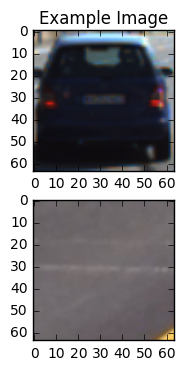

In [60]:
car_features = extract_features(img_car, cspace=cspace_v, spatial_size=spatial_size_v,
                        hist_bins=hist_bins_v, hist_range=hist_range_v, channel=channel)
notcar_features = extract_features(img_notcar, cspace=cspace_v, spatial_size=spatial_size_v,
                        hist_bins=hist_bins_v, hist_range=hist_range_v, channel=channel)
# Plot the examples
fig = plt.figure()
plt.subplot(211)
plt.imshow(img_car)
plt.title('Example Image')
plt.subplot(212)
plt.imshow(img_notcar)

print(np.shape(img_car))

In [11]:
# Examine feature vectors before scaling
print('Car', type(car_features), np.shape(car_features), min(car_features), max(car_features), np.median(car_features))
print('Not Car', type(notcar_features), np.shape(notcar_features), min(notcar_features), max(notcar_features), np.median(notcar_features))

Car <class 'numpy.ndarray'> (3168,) 0.0 4096.0 0.106862746179
Not Car <class 'numpy.ndarray'> (3168,) 0.0 4096.0 0.418627440929


## Scale feature vectors. Use color histogram as example(scale from -1 to +1, ndarray, float64)

Examining both feature vectors
X <class 'numpy.ndarray'> (17760, 4932)
X_scaler <class 'sklearn.preprocessing.data.StandardScaler'> ()
scaled_X <class 'numpy.ndarray'> (17760, 4932)
Car before scaling <class 'numpy.ndarray'> (4932,) 0.0 4096.0 0.165642663836
Car after scaling <class 'numpy.ndarray'> (4932,) -1.72618804756 7.57475831803 -0.294823510099


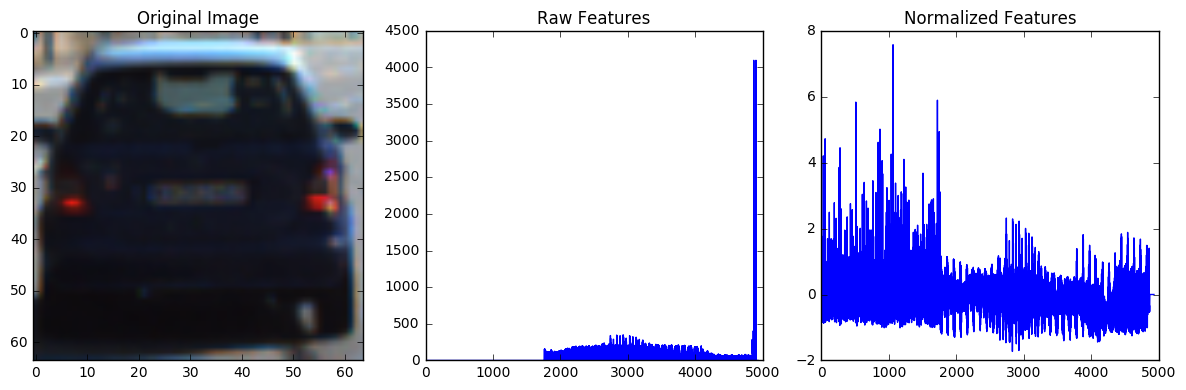

In [58]:
# Scale both feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                   
X_scaler = StandardScaler().fit(X) # Fit a per-column scaler
scaled_X = X_scaler.transform(X) # Apply the scaler to X

# Examine feature vectors after scaling
print('Examining both feature vectors')
print('X', type(X), np.shape(X))
print('X_scaler', type(X_scaler), np.shape(X_scaler))
print('scaled_X', type(scaled_X), np.shape(scaled_X))
print('Car before scaling', type(X[0]), np.shape(X[0]), min(X[0]), max(X[0]), np.median(X[0]))
print('Car after scaling', type(scaled_X[0]), np.shape(scaled_X[0]), min(scaled_X[0]), max(scaled_X[0]), np.median(scaled_X[0]))

# Plot an example of raw and scaled features
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(img_car)
plt.title('Original Image')
plt.subplot(132)
plt.plot(X[0])
plt.title('Raw Features')
plt.subplot(133)
plt.plot(scaled_X[0])
plt.title('Normalized Features')
fig.tight_layout()

In [57]:
# Playground: How to use a single feature vector

# Scale single feature vector
#X = np.vstack((car_features, car_features)).astype(np.float64)                   
#(car_features, notcar_features)
#car_features.reshape(1,-1)
X = car_features.astype(np.float64)
scaler = StandardScaler()
#X.reshape(-1, 1)
#X_scaler = StandardScaler().fit(X) # Fit a per-column scaler
scaled_X = scaler.fit_transform(X.reshape(1, -1)) # Apply the scaler to X


#X = np.array([1, -4, 5, 6, -8, 5]) # here should be your X in np.array format
#X_transformed = scaler.fit_transform(X[:, np.newaxis])

print('X', type(X), np.shape(X))
#print('X_scaler', type(X_scaler), np.shape(X_scaler))
print('scaled_X', type(scaled_X), np.shape(scaled_X))
print('Car before scaling', type(X), np.shape(X), min(X), max(X), np.median(X))
print('Car after scaling', type(scaled_X), np.shape(scaled_X), min(scaled_X), max(scaled_X), np.median(scaled_X))

# Plot an example of raw and scaled features
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(img_car)
plt.title('Original Image')
plt.subplot(132)
plt.plot(X)
plt.title('Raw Features')
plt.subplot(133)
plt.plot(scaled_X)
plt.title('Normalized Features')
fig.tight_layout()



AttributeError: 'list' object has no attribute 'astype'

## Define Function to Combine Features

### Test function in verbose form on single image

In [15]:
feature_vector = get_all_feature(img_car, verbose = True)

HOG feature characteristics
Shape of native HOG features (7, 7, 2, 2, 9)
Shape of HOG features after flattening (1764,)
Shape, min, max, median, mean, var (1764,) 0.0 0.454612742755 0.0101745611341 0.0277639528077 0.00269292876307
 
Histogram feature characteristics
Shape of histogram features (3168,)
Shape, min, max, median, mean, var (3168,) 0.0 4096.0 0.40569704771 73.2376552013 21476.1724004
Hist scaled: Shape, min, max, median, mean, var (3168,) -73.2376552013 4022.7623448 -72.8319581536 3.44505568853e-15 21476.1724004
 
Characteristics of entire feature vector
Shape, min, max, median, mean, var (4932,) 0.0 4096.0 0.147058829665 47.0530955577 15026.252222
 


In [16]:
print('Feature vector', type(feature_vector), np.shape(feature_vector), min(feature_vector), max(feature_vector), np.median(feature_vector))

Feature vector <class 'numpy.ndarray'> (4932,) 0.0 4096.0 0.147058829665


## Define and use SVM classifier

In [17]:
# Review list of files
print('Number of car images = ', len(cars))
print('Number of not car images = ', len(notcars))
rand_car = cars[random.randint(1, len(cars))]
rand_notcar = notcars[random.randint(1, len(notcars))]
print('Random car path = ', rand_car)
print('Random not car path = ', rand_notcar)

Number of car images =  8792
Number of not car images =  8968
Random car path =  /Users/blakejacquot/Desktop/temp/training_images/vehicles/KITTI_extracted/206.png
Random not car path =  /Users/blakejacquot/Desktop/temp/training_images/non-vehicles/Extras/extra2208.png


In [18]:
# Get car features
car_features = []
for file in cars:
    img = mpimg.imread(file)
    feature_vector = get_all_feature(img)
    car_features.append(feature_vector)
print(len(car_features), np.shape(car_features))

8792 (8792, 4932)


In [19]:
# Get not car features
notcar_features = []
for file in notcars:
    img = mpimg.imread(file)
    feature_vector = get_all_feature(img)
    notcar_features.append(feature_vector)
print(len(notcar_features), np.shape(notcar_features))

8968 (8968, 4932)


In [20]:
print('Shape of car and notcar features', np.shape(car_features), np.shape(notcar_features))
#car_features = np.squeeze(car_features)
#notcar_features = np.squeeze(notcar_features)
#
#print(np.shape(car_features), np.shape(notcar_features))


# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
print('Shape of stack of feature vectors', np.shape(X))

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
print('Stats of scaled X shape, min, max, mean, var', np.shape(scaled_X), np.min(scaled_X), np.max(scaled_X), np.mean(scaled_X), np.var(scaled_X))

Shape of car and notcar features (8792, 4932) (8968, 4932)
Shape of stack of feature vectors (17760, 4932)
Stats of scaled X shape, min, max, mean, var (17760, 4932) -1.97408450901 43.628026962 4.79187906963e-18 0.98702351987


In [21]:
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [22]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)


In [48]:
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))


Feature vector length: 4932
13.64 Seconds to train SVC...
Test Accuracy of SVC =  0.9806


In [49]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 100
print(len(X_test))
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

3552
My SVC predicts:  [ 0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.
  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.
  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.]
For these 100 labels:  [ 0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.
  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.
  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.]
0.00632 Seconds to predict 100 labels with SVC


## Sliding window search

In [119]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


In [126]:
# Get paths to test images
# Set up search paths and variables
testimg_path = os.path.join('.', 'test_images/')
testimgs = []

# Get vehicle and non-vehicle paths
testimgs= glob.glob(os.path.join(testimg_path, '*.jpg'))
#testimgs= glob.glob(os.path.join(testimg_path, '*.png'))

print(testimgs)



['./test_images/test1.jpg', './test_images/test2.jpg', './test_images/test3.jpg', './test_images/test4.jpg', './test_images/test5.jpg', './test_images/test6.jpg']


(720, 1280, 3) 127.244626736 0 255


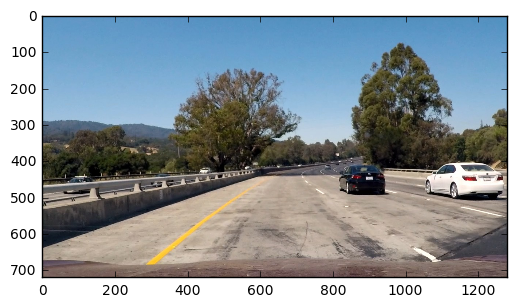

In [127]:
# Read in and examine some images
# Note for PNG files, we previously found Mean, min, max  = 0.201942 0.0 1.0
img = mpimg.imread(testimgs[0])
print(np.shape(img), np.mean(img), np.min(img), np.max(img))
plt.imshow(img)

# So the jpgs are scaled from 0 to 255. We trained on 0 to 1. Have to take this into account.


In [128]:
# Define window search space
#hog_channel = 0 # Can be 0, 1, 2, or "ALL"
#spatial_size = (16, 16) # Spatial binning dimensions
#hist_bins = 16    # Number of histogram bins
#spatial_feat = True # Spatial features on or off
#hist_feat = True # Histogram features on or off
#hog_feat = True # HOG features on or off
y_start_stop = [350, None] # Min and max in y to search in slide_window()
#color_space = 'HSV'


150


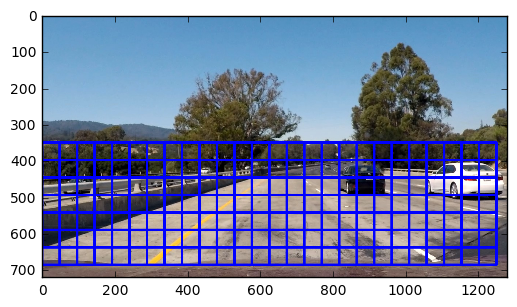

In [129]:
# Let's look at the boxes where we'll search

image = mpimg.imread(testimgs[0])
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

print(len(windows))

draw_image = draw_boxes(draw_image, windows, color=(0, 0, 255), thick=6)

plt.imshow(draw_image)

In [130]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))  

        
        #plt.imshow(test_img)
        #time.sleep(1)
        
        
        #4) Extract features for that window using single_img_features()
        #features = single_img_features(test_img, color_space=color_space, 
        #                    spatial_size=spatial_size, hist_bins=hist_bins, 
        #                    orient=orient, pix_per_cell=pix_per_cell, 
        #                    cell_per_block=cell_per_block, 
        #                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
        #                    hist_feat=hist_feat, hog_feat=hog_feat)
        features = get_all_feature(test_img, verbose = False)
        #print(np.shape(features))
        
        #5) Scale extracted features to be fed to classifier
        #print(np.shape(features), type(scaler))
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        
        
        #6) Predict using your classifier
        #prediction = clf.predict(test_features)
        prediction = clf.predict(test_features)
        
        #7) If positive (prediction == 1) then save the window
        #print(prediction)
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows


./test_images/test1.jpg
(720, 1280, 3) 0.0 1.0
(4932,)
[ 1.]
Found car
150 55


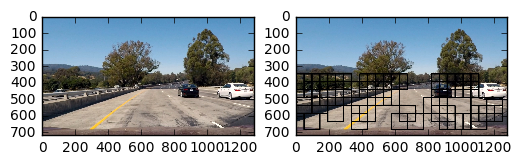

In [146]:
# Test classification on a couple of windows

index = 0
file = testimgs[index]
image = mpimg.imread(file)
print(file)


#draw_image = np.copy(image)
image = image.astype(np.float32)/255
draw_image = np.copy(image)

print(np.shape(image), np.min(image), np.max(image))

x_start_stop=[None, None]
y_start_stop = [350, None] # Min and max in y to search in slide_window()
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
            xy_window=(96, 96), xy_overlap=(0.5, 0.5))


if len(windows) == 0:
    test_img = image
else:
    window = windows[20]
    test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))  

    
features = get_all_feature(test_img, verbose = False)

print(np.shape(features))
test_features = X_scaler.transform(np.array(features).reshape(1, -1))
#test_features = scaler.transform(np.array(features).reshape(1, -1))
prediction = svc.predict(test_features)
print(prediction)

# Plot examples
#img_car = mpimg.imread(rand_car)
#img_notcar = mpimg.imread(rand_notcar)
fig = plt.figure()
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(test_img)

if prediction == 1:
    print('Found car')
else:
    print('No car')


hot_windows = []
for window in windows:
    test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
    features = get_all_feature(test_img, verbose = False)
    test_features = X_scaler.transform(np.array(features).reshape(1, -1))
    prediction = svc.predict(test_features)
    if prediction == 1:
        hot_windows.append(window)
print(len(windows),len(hot_windows))
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

126


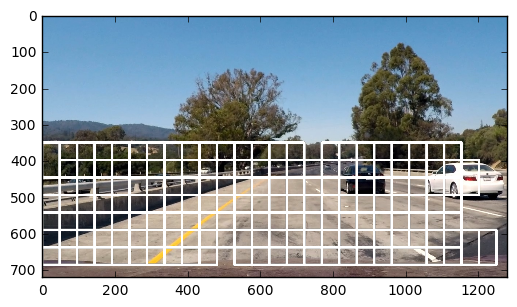

In [110]:
## Define parameters
#hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
#spatial_size = (32, 32) # Spatial binning dimensions
#hist_bins = 32    # Number of histogram bins
#spatial_feat = True # Spatial features on or off
#hist_feat = True # Histogram features on or off
#hog_feat = True # HOG features on or off






color_space = 'HSV'



# Define HOG parameters
#cspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9 # HOG orientations. 6 to 12.
pix_per_cell = 8  #HOG pixels per cell
cell_per_block = 2 # HOG cells per block. Normalization happens over block.


#    # HOG parameters
#    orient = 9 # HOG orientations. 6 to 12.
#    pix_per_cell = 8  #HOG pixels per cell
#    cell_per_block = 2 # HOG cells per block. Normalization happens over block.#
#
#    # Color histogram parameters
#    cspace_v='HSV'
#    spatial_size_v=(32, 32)
#    hist_bins_v=32
#    hist_range_v=(0, 256)
#    channel = 'ALL'
#
#    # Transform for HOG
#    img_hog = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert to grayscale 2D array
#    
#    # Get HOG features
#    hog_features = get_hog_features(img_hog, orient, 
#                            pix_per_cell, cell_per_block, 
#                            vis=False, feature_vec=False)
#    hog_features_flattened = hog_features.flatten()


image = mpimg.imread(testimgs[2])
#draw_image = np.copy(image)
#image = image.astype(np.float32)/255
draw_image = np.copy(image)


x_start_stop=[None, None]
y_start_stop = [350, None] # Min and max in y to search in slide_window()


windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

color_space='HSV'
spatial_size=(32, 32)
hist_bins=32
orient=9
pix_per_cell=8
cell_per_block=2
hog_channel='ALL'
spatial_feat=True
hist_feat=True
hog_feat=True

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)     

print(len(hot_windows))

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
#plt.imshow(image)
#plt.imshow(draw_image)


#
plt.imshow(window_img)

In [31]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
#def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
#                        hist_bins=32, orient=9, 
#                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
#                        spatial_feat=True, hist_feat=True, hog_feat=True):    

#def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
#                        hist_bins=32, orient=9, 
#                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
#                        spatial_feat=True, hist_feat=True, hog_feat=True):      
#    #1) Define an empty list to receive features
#    img_features = []
#    #2) Apply color conversion if other than 'RGB'
#    if color_space != 'RGB':
#        if color_space == 'HSV':
#            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#        elif color_space == 'LUV':
#            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
#        elif color_space == 'HLS':
#            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#        elif color_space == 'YUV':
#            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#        elif color_space == 'YCrCb':
#            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
#    else: feature_image = np.copy(img)      
#    #3) Compute spatial features if flag is set
#    if spatial_feat == True:
#        spatial_features = bin_spatial(feature_image, size=spatial_size)
#        #4) Append features to list
#        img_features.append(spatial_features)
#    #5) Compute histogram features if flag is set
#    if hist_feat == True:
#        hist_features = color_hist(feature_image, nbins=hist_bins)
#        #6) Append features to list
#        img_features.append(hist_features)
#    #7) Compute HOG features if flag is set
#    if hog_feat == True:
#        if hog_channel == 'ALL':
#            hog_features = []
#            for channel in range(feature_image.shape[2]):
#                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
#                                    orient, pix_per_cell, cell_per_block, 
#                                    vis=False, feature_vec=True))      
#        else:
#            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
#        #8) Append features to list
#        img_features.append(hog_features)
#
#    #9) Return concatenated array of features
#    return np.concatenate(img_features)


In [32]:
    
    
# Read in cars and notcars
images = glob.glob('*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread('bbox-example-image.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

IndentationError: expected an indented block (<ipython-input-32-d98cc9990b77>, line 8)

In [ ]:
xy_window_size = (64, 64)
xy_overlap_size = (0.5, 0.5)